
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab. Simple Regression </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout #3 </h2>

## Simple regression 


You have learned how to motivate your regression analysis by showing summary statistics that provide information about the data that you are using and how to show with graphs and data visualization how are the relationships that can be going on in your data set. 

You have a hypothesis about a linear relationship between your dependent variable $y$ and your independent variable $x$. These two variables are found in the following equation:
$$ y = \beta_0 +\beta_1 x + u$$ 

Your job is to estimate in the most accurate way the population parameters $\beta_0$ and $\beta_1$. 

According to Wooldridge chapter 2, given a sample of data, we choose estimates $\hat\beta_0$ and $\hat\beta_1$  to solve for the following equations:
$$n^{-1}\sum^{n}_{i=1}(y_i - \hat\beta_0 - \hat\beta_1 x_i )=0$$
$$n^{-1}\sum^{n}_{i=1}x_i(y_i - \hat\beta_0 - \hat\beta_1 x_i)=0$$
This creates a system of two equations and two unknown parameters $\hat\beta_0$ and $\hat\beta_1$. 

The first equation can be rewriten as 
$$ \bar{y}= \hat\beta_0 + \hat\beta_1 \bar{x}$$  where $\bar{y}$ and $\bar{x}$ are the sample average of each variable. With this equation we can rewrite $\beta_0$ in terms of $\beta_1, \bar{y}$ and $\bar{x}$. Then after some algebra we can write the equation for $\hat\beta_1$

$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$
$$\hat\beta_1=\frac{\sum^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y}) }{\sum^{n}_{i=1}(x_i - \bar{x})^2}$$  

You can use Python to calculate these estimates. 

## Estimation of a simple regression in R 
### DGP example
Let's imagine we know the true values for $\beta_0$ and $\beta_1$ so that the population regresion equation is $$y=2+3x+u$$
and you will estimate the model $$ y = \beta_0 +\beta_1 x + u$$ 

What can you say about your estimates $\hat\beta_0$ and $\hat\beta_1$ and the true parameters $\beta_0$ and $\beta_1$? Let's look at the example:

In [1]:
# Import your packages 
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.optimize import minimize

b: 
Intercept    2.259357
x            2.892193
dtype: float64



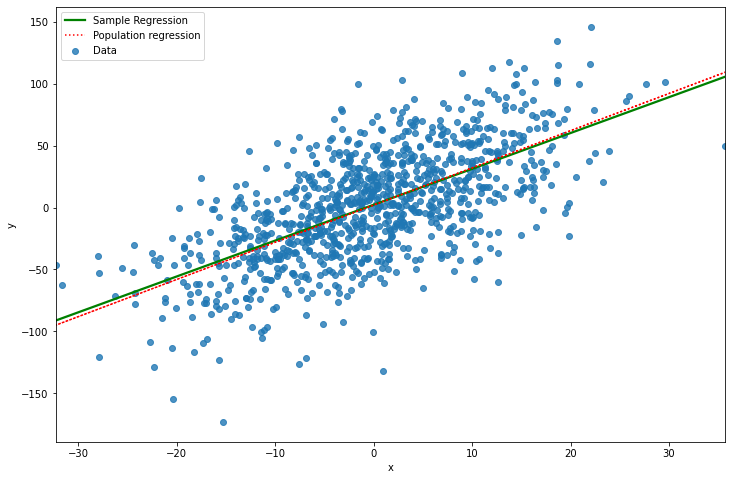

In [4]:
# Set the seed to generate reproducible results
np.random.seed(123)

#generate de population of x and u normally distributed variables of a million observations 
#and y following the equation below. 
# generates a random from the normal distribution between 0 and 10
x = np.random.normal(0,10,1000)
# generates u a random sample of 500 from the normal distribution
u = np.random.normal(0,36,1000)
# You know the actual function that relates x to y and you generate y 
y = 2+(3*x)+u
# Put all this in a dataframe
data = {"x": x, "u": u, "y": y}
# Put all vectors into a data frame to work with it later, you need that format for the graphs
datas = pd.DataFrame(data)

# Run a regresion of x on y, estimate the model y=beta_0+beta_1x lest use the ols() command from Python

# estimate a model:
reg = smf.ols(formula='y ~ x', data=datas)
results = reg.fit()

b = results.params
print(f'b: \n{b}\n')
datas['yhat'] = results

#The graph set up. 
plt.rcParams['figure.figsize'] = [12, 8]

sns.regplot(x = "x",y = "y", data = datas, line_kws={'color':'green'}, ci=None);
plt.plot(datas["x"], 2+3*datas["x"], ':r');
plt.legend(["Sample Regression",'Population regression',"Data"],loc='upper left');

# Another way to create the graphs using matplotlob instead of seaborn, 
# the population regression line 
# and the fitted values 
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.scatter(datas["x"], datas["y"] , color = 'k', alpha=0.3)
# plt.plot(datas["x"], 2+3*datas["x"], ':r', label="Pop. Reg Line")
# plt.plot(datas["x"], results.fittedvalues, 'g', label="Samp. Reg. Line")
# plt.title("A graph of {x,y}, the population regression function, and the sample regression function" )
# plt.legend(loc='upper left')
# plt.show()
    

### Step-by-Step calculation of parameters 
Following the steps above, once you define what your dependent variable (y) and independent variable (x) are, you can just create the objects and plug them into the equations to calculate the estimated parameters.  See the code below, you can just replace x and y for each specific example. 

In [5]:
# ingredients to the OLS formulas:
sumy = np.sum(y)
sumxy = np.sum((x-np.mean(x))*(y-np.mean(y)))
sumx2 = np.sum((x-np.mean(x))**2)
sumy2 = np.sum((y-np.mean(y))**2)
x_bar = np.mean(x)
y_bar = np.mean(y)
# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

b0: 2.2593572689694077

b1: 2.892193381412542



### Variance-Covariance method

We are interested in estimating the population parameters 

$\beta_0$ and $\beta_1$of the simple regression model $$ y= \beta_0 + \beta_1x + u$$

Last class we learned different ways to code the estimation of population
parameters $\hat\beta_0$ and $\hat\beta_1$. 
According to Wooldridge, you can also use the formula $$\beta_1= Cov(x,y)/var(x)$$ and $$\beta_0=\bar{y}- \hat{\beta_1}x$$ to find the ordinary least squares estimators (OLS). This means that for a given sample and a simple regression, we just need to calculate $\bar{y}, \bar{x}, Cov(x,y), Var(x)$

The Python code to find betas using the equations above is: 

In [6]:
# ingredients to the OLS formulas:
cov_xy = np.cov(x,y)[1,0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

  

b0: 2.2593572689694077

b1: 2.8921933814125413



### Using the `minimize()` function  from scipy.optimize
In Python you can also use the optimization function to  estimate the population paramaters.

Remember that you want to estimate the population parameters that minimize the residual residual sum of squares (RSS or SSR). The equation for RSS is 
$$ SSR= \sum^{n}_{i=1}\hat{u_i}^2=\sum^{n}_{i=1}(y_i - \hat\beta_0 - \hat\beta_1 x_i)^2$$
The function `minimize()` optimizes a function and finds the parameters. Here you create a vector of parameters 
<br>
`b = np.array([0.5,0.5])` . See the code below:

In [7]:


#Create initial values for the Beta parameters
b = np.array([0.5, 0.5])

#create a column of constants
k= np.ones(len(x))

# Create function for Sum of square residuals (SSR)
def sse(b,y,x,k):
    return np.sum((y-b[0]*k-b[1]*x)**2)

#Use minimize from scipy.optimize to find the parameters beta that minimize the SSR
resa = minimize(fun=sse,
               args=(y, x, k),
               x0 = b)

# print results
print(resa['x'])


[2.25936227 2.89219342]


### The `smf.ols()` command 

Python has a module to make your life easier to allow you to do more soficticated regressions. The statsmodels module. This command will be the workhorse of our class during the semester; it provides you all the information you need for your regression results. Today we will only see how it estimates the parameters. We will learn all about this command in future classes. 

Code to estimate the equation $$y=\beta_0+\beta_1x$$ 

In [8]:
# estimate log-level model:
reg = smf.ols(formula = 'y ~ x', data = datas)
results = reg.fit()

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 3),
                      'se': round(results.bse, 3),
                      't': round(results.tvalues, 3),
                      'pval': round(results.pvalues, 3)})
print(f'Coefficients Table:' )
display(table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     703.6
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          9.05e-118
Time:                        16:56:45   Log-Likelihood:                -4959.1
No. Observations:                1000   AIC:                             9922.
Df Residuals:                     998   BIC:                             9932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2594      1.092

,b,se,t,pval
Intercept,2.259,1.092,2.069,0.039
x,2.892,0.109,26.526,0.000


## In-class exercise
Now let's use the data wage1 from last class to estimate the equation 
$$wage = \beta_0 + \beta_1 education + u$$
in the three different ways we learned today. Do you obtain the same results?

In [10]:
# With the wooldridge package. 
wage1 = woo.dataWoo('wage1')
# If the wooldridge package is not working for you. You can just download 
#the data form this link change the name of the dataset and read into 
wage1 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/wage1.dta')
# wage is my dependent variable y
# educ is de independent variable x
# the easiest ways is to set those variables up and copy and paste. 
y = wage1['wage']
x=wage1['educ']
datas = pd.DataFrame({'x':x, 'y':y})

# ingredients to the OLS formulas:
sumy = np.sum(y)
sumxy = np.sum((x-np.mean(x))*(y-np.mean(y)))
sumx2 = np.sum((x-np.mean(x))**2)
sumy2 = np.sum((y-np.mean(y))**2)
x_bar = np.mean(x)
y_bar = np.mean(y)
# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

# ingredients to the OLS formulas:
cov_xy = np.cov(x,y)[1,0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

#Create initial values for the Beta parameters
b = np.array([0.5, 0.5])

#create a column of constants
k= np.ones(len(x))

# Create function for Sum of square residuals (SSR)
def sse(b,y,x,k):
    return np.sum((y-b[0]*k-b[1]*x)**2)

#Use minimize from scipy.optimize to find the parameters beta that minimize the SSR
resa = minimize(fun=sse,
               args=(y, x, k),
               x0 = b)

# print results
print(resa['x'])

# estimate log-level model:
reg = smf.ols(formula = 'y ~ x', data = datas)
results = reg.fit()

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 3),
                      'se': round(results.bse, 3),
                      't': round(results.tvalues, 3),
                      'pval': round(results.pvalues, 3)})
print(f'Coefficients Table:' )
display(table)


b0: -0.904854034646462

b1: 0.5413592457771301

b0: -0.904867948700427

b1: 0.5413603533425795

[-0.38526613  0.5       ]
results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           2.78e-22
Time:                        17:01:32   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

,b,se,t,pval
Intercept,-0.905,0.685,-1.321,0.187
x,0.541,0.053,10.167,0.000


&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;